In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load image
img = cv2.imread('foto.jpg', 0)

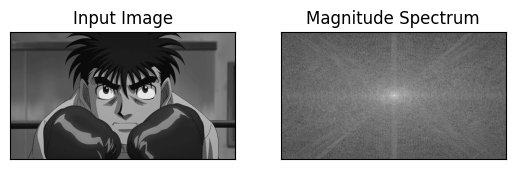

In [10]:
# 1. FFT (Fast Fourier Transform)
f_img = np.fft.fft2(img)
f_img_shifted = np.fft.fftshift(f_img)
magnitude_spectrum = 20*np.log(np.abs(f_img_shifted))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

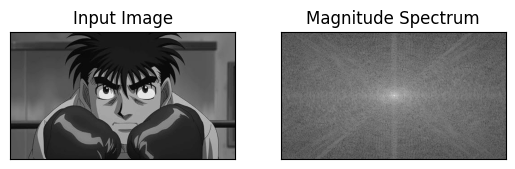

In [11]:
# 2. DFT (Discrete Fourier Transform)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

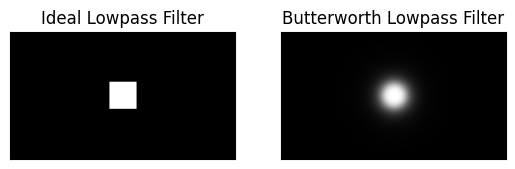

In [12]:
# 3. Ideal Lowpass Filter & Butterworth Lowpass Filter
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# Ideal Lowpass Filter
ideal_lowpass = np.zeros((rows,cols))
ideal_lowpass[crow-30:crow+30, ccol-30:ccol+30] = 1

# Butterworth Lowpass Filter
butterworth_lowpass = np.zeros((rows,cols))
D = 30
n = 2
for i in range(rows):
    for j in range(cols):
        butterworth_lowpass[i,j] = 1 / (1 + (np.sqrt((i-crow)**2 + (j-ccol)**2) / D)**(2*n))

plt.subplot(121),plt.imshow(ideal_lowpass, cmap = 'gray')
plt.title('Ideal Lowpass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(butterworth_lowpass, cmap = 'gray')
plt.title('Butterworth Lowpass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

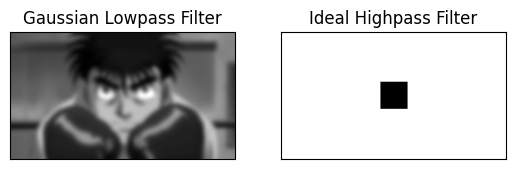

In [13]:

# 4. Gaussian Lowpass Filter & Ideal Highpass Filter
# Gaussian Lowpass Filter
gaussian_lowpass = cv2.GaussianBlur(img, (31,31), 0)

# Ideal Highpass Filter
ideal_highpass = np.ones((rows, cols))
ideal_highpass[crow-30:crow+30, ccol-30:ccol+30] = 0

plt.subplot(121),plt.imshow(gaussian_lowpass, cmap = 'gray')
plt.title('Gaussian Lowpass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ideal_highpass, cmap = 'gray')
plt.title('Ideal Highpass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

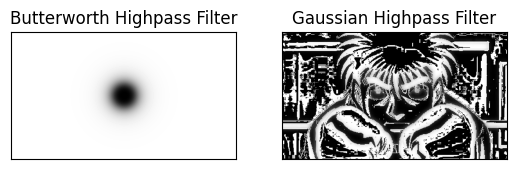

In [14]:
# 5. Butterworth Highpass Filter & Gaussian Highpass Filter
# Butterworth Highpass Filter
butterworth_highpass = 1 - butterworth_lowpass

# Gaussian Highpass Filter
gaussian_highpass = img - gaussian_lowpass

plt.subplot(121),plt.imshow(butterworth_highpass, cmap = 'gray')
plt.title('Butterworth Highpass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_highpass, cmap = 'gray')
plt.title('Gaussian Highpass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

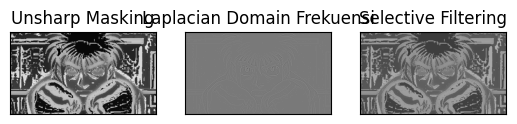

In [15]:
# 6. Filter Unsharp Masking & Filter Laplacian Domain Frekuensi & Selective Filtering
# Filter Unsharp Masking (Highboost Filtering)
k = 1.5
unsharp_mask = img + k * (img - gaussian_lowpass)

# Filter Laplacian Domain Frekuensi
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# Selective Filtering
selective_filtering = laplacian + unsharp_mask

plt.subplot(131),plt.imshow(unsharp_mask, cmap = 'gray')
plt.title('Unsharp Masking'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian Domain Frekuensi'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(selective_filtering, cmap = 'gray')
plt.title('Selective Filtering'), plt.xticks([]), plt.yticks([])
plt.show()